This notebook contains code to prepare some of the graphs and tables in the article Kaushik et al: The effect of hyperaldosteronism...


Some packages might need to be installed, for example:
* https://github.com/mancellin/PolygonArea.jl

In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/work/students/sumit_kaushik/ultrasound_texture`


In [17]:
#using Distributions: minimum
#import XLSX
#using Distributions
#using Statistics
#using Plots
#using StatsPlots
#using DataFrames
#import HypothesisTests
#using Formatting
using Revise
#include("utilities.jl")
#using Statistics, RDatasets, LIBLINEAR
#using MLBase
#using MLJ

include("article_experiments.jl")
#include("wavelet.jl")

classification_table

Read the table of subjects and their clinical attributes

In [3]:
df=read_clinical_attributes()

118×81 DataFrame
 Row │ Dg      pkey    name           Age    Sex    ICHS   ICHDK  CMP    DM    ⋯
     │ String  Int64?  String         Int64  Bool   Int64  Int64  Int64  Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ KO         280  Boušková P        66   true      0      0      0      0 ⋯
   2 │ KO         182  Činčár M          40  false      0      0      0      0
   3 │ KO         185  Duchoňová M       54   true      0      0      0      0
   4 │ KO         278  Fryšová M         63   true      0      0      0      0
   5 │ KO         279  Galle P           59  false      0      0      0      0 ⋯
   6 │ KO         276  Hofmanová H       53   true      0      0      0      0
   7 │ KO         224  Holajová Z        58   true      0      0      0      0
   8 │ KO         132  Holý J            61  false      0      0      0      0
   9 │ KO         256  Hübnerová J       53   true      0      0      0      0 ⋯
  10 │ KO         253  Huslar O          52  false      0      0      0      0
  11 │ KO         259  Chlupová J        60   true      0      0      0      0
  ⋮  │   ⋮       ⋮           ⋮          ⋮      ⋮      ⋮      ⋮      ⋮      ⋮   ⋱
 109 │ PA         162  Mraček J          47  false      0      0      0      0
 110 │ PA         269  Neumannová M      67   true      0      0      0      1 ⋯
 111 │ PA          65  Novák V           62  false      0      0      0      1
 112 │ PA         250  Podhorský L       59  false      1      0      0      1
 113 │ PA         130  Procházka J       57  false      0      0      0      1
 114 │ PA         186  Rambousková J     43   true      0      0      0      0 ⋯
 115 │ PA         249  Škapová V         45   true      0      0      0      0
 116 │ PA         211  Štefaňák J        70  false      0      0      0      1
 117 │ PA         267  Štěpánková Z      54   true      0      0      0      0
 118 │ PA         243  Turínová M        52   true      0      0      0      0 ⋯
                                                  72 columns and 97 rows omitted

List of clinical, IMT, and aldosteron-related attributes

In [6]:
attrs

19-element Vector{Attr}:
 Attr("Age", "Age [years]", true, false, 0, clinical)
 Attr("Sex", "Ratio of females", true, true, 2, clinical)
 Attr("Váha", "Weight [kg]", true, false, 0, clinical)
 Attr("Výška", "Height [cm]", true, false, 0, clinical)
 Attr("BMI", "Body mass index \$[\\text{kg}\\cdot\\text{m}^{-2}]\$", true, false, 1, clinical)
 Attr("Kaz_STK", "Systolic blood pressure [mmHg]", true, false, 0, clinical)
 Attr("Kaz_DTK", "Diastolic blood pressure [mmHg]", true, false, 0, clinical)
 Attr("Kouření", "Ratio of smokers", true, true, 2, clinical)
 Attr("Chol", "Plasma cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("LDL", "LDL cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("HDL", "HDL cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("Tg", "Triglycerides [mmol/l]", true, false, 2, clinical)
 Attr("Glyk", "Fasting plasma glucose   [mmol/l]", true, false, 2, clinical)
 Attr("Aldo_vstoje", "Plasma aldosterone  [ng/l]", true, false, 0, aldo)
 Attr("PRA_vstoje", "

Extract an attribute given the Attr structure, evaluate the statistics and print one line of a table in the LaTeX format with means, standard deviations and p values for the t-test between groups EH versus PH and all hypertension  versus normal controls. `missing` values are ignored. This is used for Table 2 in the article

In [123]:
filter(x -> x.group==clinical,attrs)

13-element Vector{Attr}:
 Attr("Age", "Age [years]", true, false, 0, clinical)
 Attr("Sex", "Ratio of females", true, true, 2, clinical)
 Attr("Váha", "Weight [kg]", true, false, 0, clinical)
 Attr("Výška", "Height [cm]", true, false, 0, clinical)
 Attr("BMI", "Body mass index \$[\\text{kg}\\cdot\\text{m}^{-2}]\$", true, false, 1, clinical)
 Attr("Kaz_STK", "Systolic blood pressure [mmHg]", true, false, 0, clinical)
 Attr("Kaz_DTK", "Diastolic blood pressure [mmHg]", true, false, 0, clinical)
 Attr("Kouření", "Ratio of smokers", true, true, 2, clinical)
 Attr("Chol", "Plasma cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("LDL", "LDL cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("HDL", "HDL cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("Tg", "Triglycerides [mmol/l]", true, false, 2, clinical)
 Attr("Glyk", "Fasting plasma glucose   [mmol/l]", true, false, 2, clinical)

In [4]:
 sum(df.Dg .== "KO") # how many controls

33

In [5]:
sum(df.Dg .== "PA")

33

In [6]:
sum(df.Dg .== "EH")

52

In [5]:
parameters_table(df,attrs)

Age [years] & $ 57 \pm 8 $ & $ 55 \pm 7 $ & $ 56 \pm 7 $ & $ 54 \pm 8 $ \\
Ratio of females & $ 0.39  $ & $ 0.38  $ & $ 0.39  $ & $ 0.48  $ \\
Weight [kg] & $ 90 \pm 17 $ & $ 84 \pm 15 $ & $ 86 \pm 16 $ & $ 80 \pm 15 $ \\
Height [cm] & $ 175 \pm 9 $ & $ 172 \pm 8 $ & $ 173 \pm 9 $ & $ 173 \pm 10 $ \\
Body mass index $[\text{kg}\cdot\text{m}^{-2}]$ & $ 29.0 \pm 3.9 $ & $ 28.4 \pm 4.6 $ & \boldmath $ 28.7 \pm 4.3 $ & \boldmath $ 26.6 \pm 4.2 $ \\
Systolic blood pressure [mmHg] & $ 164 \pm 23 $ & $ 170 \pm 30 $ & \boldmath $ 168 \pm 28 $ & \boldmath $ 125 \pm 15 $ \\
Diastolic blood pressure [mmHg] & $ 97 \pm 14 $ & $ 99 \pm 17 $ & \boldmath $ 98 \pm 16 $ & \boldmath $ 78 \pm 9 $ \\
Ratio of smokers & $ 0.33  $ & $ 0.38  $ & $ 0.36  $ & $ 0.24  $ \\
Plasma cholesterol [mmol/l] & $ 4.98 \pm 1.05 $ & $ 5.28 \pm 1.00 $ & \boldmath $ 5.16 \pm 1.02 $ & \boldmath $ 5.59 \pm 0.97 $ \\
LDL cholesterol [mmol/l] & $ 2.99 \pm 0.87 $ & $ 3.06 \pm 0.77 $ & $ 3.03 \pm 0.81 $ & $ 3.19 \pm 0.84 $ \\
HDL 

Create a table of features sorted on the p-values (Table 4). Filter only attributes significant according to the t-test in distinguishing PA and EH or PA+EG and controls.

In [6]:
pvalues=map(a -> calculate_pvalues(df,a),attrs)


filter!(x -> x.welchpa<0.05 || x.welchpc<0.05,pvalues)

sort!(pvalues, by= x->x.welchpa)


pvalue_table(pvalues)


┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_

Plasma aldosterone  [ng/l] & $<0.001$ & $<0.001$ & $<0.001$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
ARR   [ng/100ml]/[ng/ml$\cdot$h] & $<0.001$ & $<0.001$ & $<0.001$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
Plasma renin activity [ng/ml$\cdot$h] & $0.004$ & $0.002$ & $<0.001$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
CCA mean IMT [mm] & $0.007$ & $0.012$ & $0.013$ & $<0.001$ & $<0.001$ & $<0.001$  \\
Mean IMT [mm] & $0.022$ &  & $0.025$ & $<0.001$ & $0.008$ & $0.001$  \\
Fasting plasma glucose   [mmol/l] & $0.037$ &  &  &  &  &   \\
Plasma cholesterol [mmol/l] &  &  &  & $0.041$ &  &   \\
HDL cholesterol [mmol/l] &  &  &  & $0.002$ & $0.004$ & $<0.001$  \\
Systolic blood pressure [mmHg] &  &  &  & $<0.001$ & $<0.001$ & $<0.001$  \\
Body mass index $[\text{kg}\cdot\text{m}^{-2}]$ &  &  &  & $0.024$ &  & $0.019$  \\
Diastolic blood pressure [mmHg] &  &  &  & $<0.001$ & $<0.001$ & $<0.001$  \\
CB mean IMT [mm] &  &  &  & $0.004$ &  & $0.016$  \\


Read the images using Sumit's routine from utilities.jl, where I added the control group

In [7]:
textures=prepare_for_classification_with_controls(prefix * "/Ultrasound/majtan/final_150722/","old")

261-element Vector{Feature}:
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.027) Gray{N0f8}(0.035) … Gray{N0f8}(0.086) Gray{N0f8}(0.082); Gray{N0f8}(0.039) Gray{N0f8}(0.047) … Gray{N0f8}(0.114) Gray{N0f8}(0.11); … ; Gray{N0f8}(0.58) Gray{N0f8}(0.573) … Gray{N0f8}(0.557) Gray{N0f8}(0.565); Gray{N0f8}(0.608) Gray{N0f8}(0.6) … Gray{N0f8}(0.467) Gray{N0f8}(0.471)], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], "Benes_105.bmp")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.008) Gray{N0f8}(0.012) … Gray{N0f8}(0.063) Gray{N0f8}(0.055); Gray{N0f8}(0.027) Gray{N0f8}(0.027) … Gray{N0f8}(0.082) Gray{N0f8}(0.075); … ; Gray{N0f8}(0.263) Gray{N0f8}(0.243) … Gray{N0f8}(0.184) Gray{N0f8}(0.196); Gray{N0f8}(0.267) Gray{N0f8}(0.267) … Gray{N0f8}(0.192) Gray{N0f8}(0.2)], Bool[0 0 … 1 1; 0 0 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], "Benes_150.bmp")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.149) Gray{N0f8}(0.137) … Gray{N0f8}(0.024) Gray{N0f8}(0.024); Gray{N0f8}(0.282) Gray{N0f8}(0.267) … Gray{N0f8}(0.027) Gray{N0f8}(0.024); … ; Gr

Prepare a list of wavelet and Haralick texture attributes and evaluate them for all images in `textures`. 

In [9]:
dfw,wattrs=calculate_texture_features(textures)

i=1 size=(40, 405) name=Benes_105.bmp
i=2 size=(33, 271) name=Benes_150.bmp
i=3 size=(28, 402) name=Benes_210.bmp
i=4 size=(42, 423) name=Benes_255.bmp
i=5 size=(26, 231) name=Bulirova_150.bmp
i=6 size=(29, 212) name=Bulirova_210.bmp
i=7 size=(29, 249) name=Bulirova_255.bmp
i=8 size=(17, 129) name=Bulirova_90.bmp
i=9 size=(19, 222) name=Cermak_150.bmp
i=10 size=(13, 98) name=Cermak_270.bmp
i=11 size=(11, 160) name=Eichler_120.bmp
i=12 size=(33, 284) name=Feierfeil_105.bmp
i=13 size=(34, 217) name=Feierfeil_135.bmp
i=14 size=(28, 357) name=Feierfeil_210.bmp
i=15 size=(32, 250) name=Feierfeil_270.bmp
i=16 size=(23, 301) name=Figrova Eva_150.bmp
i=17 size=(25, 243) name=Figrova Eva_210.bmp
i=18 size=(28, 109) name=Figrova Eva_90.bmp
i=19 size=(20, 135) name=Hanzlik_105.bmp
i=20 size=(24, 182) name=Havlova Miluse_150.bmp
i=21 size=(29, 300) name=Havlova Miluse_210.bmp
i=22 size=(32, 247) name=Havlova Miluse_270.bmp
i=23 size=(41, 258) name=Havlova Miluse_90.bmp
i=24 size=(29, 215) name=Jen

i=236 size=(23, 141) name=Soukupova_150.bmp
i=237 size=(23, 294) name=Soukupova_210.bmp
i=238 size=(24, 146) name=Soukupova_270.bmp
i=239 size=(33, 360) name=Soukupova_90.bmp
i=240 size=(29, 241) name=Sramarova_150.bmp
i=241 size=(32, 233) name=Sramarova_210.bmp
i=242 size=(29, 236) name=Stastna_105.bmp
i=243 size=(26, 315) name=Stastna_150.bmp
i=244 size=(17, 162) name=Stastna_210.bmp
i=245 size=(20, 351) name=Stastna_255.bmp
i=246 size=(26, 355) name=Urbanek_105.bmp
i=247 size=(28, 247) name=Urbanek_150.bmp
i=248 size=(22, 184) name=Urbanek_210.bmp
i=249 size=(26, 241) name=Urbanek_240.bmp
i=250 size=(19, 208) name=Urbankova_135.bmp
i=251 size=(29, 194) name=Urbankova_210.bmp
i=252 size=(25, 315) name=Urbankova_255.bmp
i=253 size=(22, 281) name=Urbankova_90.bmp
i=254 size=(34, 310) name=Vojtechovska_105.bmp
i=255 size=(20, 220) name=Vojtechovska_150.bmp
i=256 size=(35, 216) name=Vojtechovska_210.bmp
i=257 size=(23, 276) name=Vojtechovska_270.bmp
i=258 size=(19, 231) name=Widimsky_105

(261×155 DataFrame
 Row │ W11          W12          W13          W21          W22          W23    ⋯
     │ Float64      Float64      Float64      Float64      Float64      Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 5.66346e-5   0.00179912   0.00013535   0.000166069  0.00240834   0.0002 ⋯
   2 │ 0.000173599  0.00119967   0.000404046  0.000157845  0.0017063    0.0003
   3 │ 0.000104176  0.00460281   0.000261863  0.000180404  0.00837036   0.0003
   4 │ 6.30118e-5   0.00227577   0.000182425  0.00021331   0.00427529   0.0003
   5 │ 2.12665e-5   0.000382397  6.46395e-5   7.09434e-5   0.000508242  0.0001 ⋯
   6 │ 0.000111839  0.00291746   0.000317953  0.000216036  0.00588796   0.0003
   7 │ 0.000168699  0.00449234   0.000345984  0.000279872  0.00884147   0.0003
   8 │ 3.12373e-5   0.00204916   0.000110583  8.92396e-5   0.00343335   0.0002
   9 │ 6.71103e-6   0.000175505  2.21431e-5   1.83247e-5   0.000170954  4.4713 ⋯
  10 │ 7.5682e-6    0

In [10]:
dfw.sigma

261-element Vector{Float64}:
 0.13379732476161307
 0.10408532932836119
 0.15923232344700497
 0.13830368929913336
 0.060797723235423665
 0.10602875963338926
 0.1405022447202396
 0.07899399805302888
 0.031167907603802236
 0.023675619043453337
 0.016001200093579627
 0.17621407416417834
 0.17559811736930597
 ⋮
 0.1337162929075376
 0.13050704090319526
 0.11731702923429953
 0.14480143203827409
 0.13580484998075007
 0.12778745123181026
 0.09527128786899605
 0.09179193298188264
 0.11572572340827517
 0.09679638799832514
 0.11061759377071792
 0.13347837892718353

Now merge the clinical and texture features.

In [11]:
dfa=merge_datasets(df,dfw)

Boušková P KO-> Bouskova, [171, 172, 173, 174]
No textures entry found for 'Činčár M'  KO -> 'Cincar'
Duchoňová M KO-> Duchonova, [179, 180, 181, 182]
Fryšová M KO-> Frysova, [183, 184, 185, 186]
Galle P KO-> Galle, [187, 188, 189, 190]
Hofmanová H KO-> Hofmanova, [191, 192, 193]
Holajová Z KO-> Holajova, [194, 195, 196, 197]
No textures entry found for 'Holý J'  KO -> 'Holy'
Hübnerová J KO-> Hubnerova, [198, 199, 200]
Huslar O KO-> Huslar, [201, 202, 203, 204]
Chlupová J KO-> Chlupova, [175, 176, 177, 178]
Kajš V KO-> Kajs, [205, 206, 207, 208]
Kolařík J KO-> Kolarik, [209, 210, 211, 212]
No textures entry found for 'Krček J'  KO -> 'Krcek'
No textures entry found for 'Martinů M'  KO -> 'Martinu'
Müller J KO-> Muller, [213, 214, 215, 216]
Nývltová A KO-> Nyvltova, [217, 218, 219, 220]
Poláková E KO-> Polakova, [221, 222, 223]
Prostý M KO-> Prosty, [224, 225, 226, 227]
No textures entry found for 'Rabasová A'  KO -> 'Rabasova'
No textures entry found for 'Sháněl M'  KO -> 'Shanel'
Scho

250×235 DataFrame
 Row │ Dg      pkey    name            Age    Sex    ICHS   ICHDK  CMP    DM   ⋯
     │ String  Int64?  String          Int64  Bool   Int64  Int64  Int64  Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ EH         188  Beneš M            67  false      1      0      0       ⋯
   2 │ EH         188  Beneš M            67  false      1      0      0
   3 │ EH         188  Beneš M            67  false      1      0      0
   4 │ EH         188  Beneš M            67  false      1      0      0
   5 │ EH         264  Bulířová V         61   true      0      0      0       ⋯
   6 │ EH         264  Bulířová V         61   true      0      0      0
   7 │ EH         264  Bulířová V         61   true      0      0      0
   8 │ EH         264  Bulířová V         61   true      0      0      0
   9 │ EH         160  Feierfeil Z        62  false      0      0      0       ⋯
  10 │ EH         160  Feierfeil Z        62  false      0      0      0
  11 │ EH         160  Feierfeil Z        62  false      0      0      0
  ⋮  │   ⋮       ⋮           ⋮           ⋮      ⋮      ⋮      ⋮      ⋮      ⋮  ⋱
 241 │ KO         166  Urbánková H        54   true      0      0      0
 242 │ KO         166  Urbánková H        54   true      0      0      0       ⋯
 243 │ KO         277  Vojtěchovská M     63   true      0      0      0
 244 │ KO         277  Vojtěchovská M     63   true      0      0      0
 245 │ KO         277  Vojtěchovská M     63   true      0      0      0
 246 │ KO         277  Vojtěchovská M     63   true      0      0      0       ⋯
 247 │ KO         180  Widimský J         49  false      0      0      0
 248 │ KO         180  Widimský J         49  false      0      0      0
 249 │ KO         180  Widimský J         49  false      0      0      0
 250 │ KO         180  Widimský J         49  false      0      0      0       ⋯
                                                227 columns and 229 rows omitted

In [12]:
map(a -> (a.colname,a.descr,dfa[1,a.colname]),vcat(attrs,wattrs)) # show attributes for the first entry

171-element Vector{Tuple{String, String, Real}}:
 ("Age", "Age [years]", 67)
 ("Sex", "Ratio of females", false)
 ("Váha", "Weight [kg]", 83)
 ("Výška", "Height [cm]", 185)
 ("BMI", "Body mass index \$[\\text{kg}\\cdot\\text{m}^{-2}]\$", 24.2512783053324)
 ("Kaz_STK", "Systolic blood pressure [mmHg]", 150)
 ("Kaz_DTK", "Diastolic blood pressure [mmHg]", 80)
 ("Kouření", "Ratio of smokers", 0)
 ("Chol", "Plasma cholesterol [mmol/l]", 5.07999992370606)
 ("LDL", "LDL cholesterol [mmol/l]", 3.29999995231628)
 ("HDL", "HDL cholesterol [mmol/l]", 1.22000002861023)
 ("Tg", "Triglycerides [mmol/l]", 1.24000000953674)
 ("Glyk", "Fasting plasma glucose   [mmol/l]", 4.30000019073486)
 ⋮
 ("H535", "\$H_{5,90,5}\$", 0.1311868113372851)
 ("H536", "\$H_{5,90,6}\$", 1.9487179487179485)
 ("H537", "\$H_{5,90,7}\$", 0.017209979468844432)
 ("H541", "\$H_{5,135,1}\$", 0.6116551055851095)
 ("H542", "\$H_{5,135,2}\$", 0.8993574174432594)
 ("H543", "\$H_{5,135,3}\$", 1.80975)
 ("H544", "\$H_{5,135,4}\$", 0.07

Calculate the pvalues for the texture features (Table 5) of the article.

In [17]:
pvaluesw=map(a -> calculate_pvalues(dfa,a),wattrs)
filter!(x -> x.welchpa<0.05 || x.welchpc<0.05,pvaluesw) # keep only the significant ones
#filter!(x -> x.welchpa<0.05,pvaluesw) # keep only the significant ones
sort!(pvaluesw, by= x->x.welchpa)
pvalue_table(pvaluesw[1:10];always=true)

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_

$W_{2,2}$ & $0.295$ & $0.538$ & $0.401$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$W_{3,3}$ & $0.300$ & $0.521$ & $0.316$ & $<0.001$ & $0.034$ & $0.003$  \\
$W_{3,2}$ & $0.342$ & $0.360$ & $0.428$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$W_{3,1}$ & $0.380$ & $0.773$ & $0.401$ & $<0.001$ & $0.010$ & $<0.001$  \\
$H_{1,0,2}$ & $0.435$ & $0.125$ & $0.203$ & $0.001$ & $<0.001$ & $<0.001$  \\
$H_{1,135,2}$ & $0.435$ & $0.125$ & $0.203$ & $0.001$ & $<0.001$ & $<0.001$  \\
$W_{2,3}$ & $0.444$ & $0.715$ & $0.416$ & $<0.001$ & $0.017$ & $0.005$  \\
$H_{2,135,2}$ & $0.455$ & $0.155$ & $0.237$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{2,0,2}$ & $0.455$ & $0.155$ & $0.237$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$W_0$ & $0.499$ & $0.294$ & $0.591$ & $<0.001$ & $<0.001$ & $<0.001$  \\


In [18]:
pvalue_table(pvaluesw[1:10])

$W_{2,2}$ &  &  &  & $<0.001$ & $<0.001$ & $<0.001$  \\
$W_{3,3}$ &  &  &  & $<0.001$ & $0.034$ & $0.003$  \\
$W_{3,2}$ &  &  &  & $<0.001$ & $<0.001$ & $<0.001$  \\
$W_{3,1}$ &  &  &  & $<0.001$ & $0.010$ & $<0.001$  \\
$H_{1,0,2}$ &  &  &  & $0.001$ & $<0.001$ & $<0.001$  \\
$H_{1,135,2}$ &  &  &  & $0.001$ & $<0.001$ & $<0.001$  \\
$W_{2,3}$ &  &  &  & $<0.001$ & $0.017$ & $0.005$  \\
$H_{2,135,2}$ &  &  &  & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{2,0,2}$ &  &  &  & $<0.001$ & $<0.001$ & $<0.001$  \\
$W_0$ &  &  &  & $<0.001$ & $<0.001$ & $<0.001$  \\


In [107]:
"$(length(pvaluesw)) out of $(length(wattrs)) are significant at the 5% level"

"111 out of 152 are significant at the 5% level"

In [108]:
map(a->calculate_pvalues(dfa,a),wattrs[10:20])

11-element Vector{NamedTuple{(:a, :welchpa, :kspa, :mwpa, :welchpc, :kspc, :mwpc), Tuple{Attr, Float64, Float64, Float64, Float64, Float64, Float64}}}:
 (a = Attr("W0", "\$W_0\$", true, false, 2, texture), welchpa = 0.49888926654315635, kspa = 0.29403261915959833, mwpa = 0.590963407966449, welchpc = 2.526411083215874e-7, kspc = 5.565374607486463e-6, mwpc = 2.1691239802613736e-7)
 (a = Attr("H111", "\$H_{1,0,1}\$", true, false, 2, texture), welchpa = 0.11931215806101796, kspa = 0.5527950404798696, mwpa = 0.22299905459153285, welchpc = 0.5970461592095516, kspc = 0.16655773998471657, mwpc = 0.650822311533115)
 (a = Attr("H112", "\$H_{1,0,2}\$", true, false, 2, texture), welchpa = 0.435173050665149, kspa = 0.12474463306152896, mwpa = 0.2027647282172032, welchpc = 0.0011639742484441191, kspc = 0.0007352057904450423, mwpc = 0.0002459845207838087)
 (a = Attr("H113", "\$H_{1,0,3}\$", true, false, 2, texture), welchpa = 0.5402537578550252, kspa = 0.51959060411868, mwpa = 0.3810041454784292, wel

In [26]:
pvaluesw[1]

(a = Attr("W22", "\$W_{2,2}\$", true, false, 2, texture),
 welchpa = 0.2947065069291551,
 kspa = 0.537943460184122,
 mwpa = 0.4005653408019767,
 welchpc = 1.557433912862321e-11,
 kspc = 8.998490641623126e-10,
 mwpc = 5.1154629315155124e-11,)

Let's try the classification. First just the clinical features. Store the results into a dataframe.

In [13]:
clinicalfilter=x -> x.group==clinical && x.colname!="Váha" && x.colname!="Výška" && x.colname!="BMI"
imtfilter=x -> clinicalfilter(x) || x.group==imt
textureonlyfilter=x -> x.group==texture
texturefilter=x -> textureonlyfilter(x) || imtfilter(x)
clinicaltexturefilter = x -> textureonlyfilter(x) || clinicalfilter(x)
#featuresets=[("clinical",clinicalfilter),("clinical+imt",imtfilter),("clinical+IMT+texture",texturefilter),
#            ("clinical+texture",clinicaltexturefilter),  
#            ("texture only",textureonlyfilter)]
featuresets=[ #("clinical",clinicalfilter),
              #("clinical+texture",clinicaltexturefilter),  
            ("texture only",textureonlyfilter)]

#featureset=("trivial",x -> x.colname=="Sex" || x.colname=="LDL")
task0=("PA+EH vs. C", x -> x != "KO", x -> x == "KO")
task1=("PA vs. EH", x -> x == "PA", x -> x == "EH" )
allattrs=vcat(attrs,wattrs)

171-element Vector{Attr}:
 Attr("Age", "Age [years]", true, false, 0, clinical)
 Attr("Sex", "Ratio of females", true, true, 2, clinical)
 Attr("Váha", "Weight [kg]", true, false, 0, clinical)
 Attr("Výška", "Height [cm]", true, false, 0, clinical)
 Attr("BMI", "Body mass index \$[\\text{kg}\\cdot\\text{m}^{-2}]\$", true, false, 1, clinical)
 Attr("Kaz_STK", "Systolic blood pressure [mmHg]", true, false, 0, clinical)
 Attr("Kaz_DTK", "Diastolic blood pressure [mmHg]", true, false, 0, clinical)
 Attr("Kouření", "Ratio of smokers", true, true, 2, clinical)
 Attr("Chol", "Plasma cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("LDL", "LDL cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("HDL", "HDL cholesterol [mmol/l]", true, false, 2, clinical)
 Attr("Tg", "Triglycerides [mmol/l]", true, false, 2, clinical)
 Attr("Glyk", "Fasting plasma glucose   [mmol/l]", true, false, 2, clinical)
 ⋮
 Attr("H535", "\$H_{5,90,5}\$", true, false, 2, texture)
 Attr("H536", "\$H_{5,90,6}\$", t

In [14]:
classifier_factory=(@load XGBoostClassifier pkg=XGBoost verbosity=0)
#r=evaluate_classification(dfa,featuresets[1],task1,allattrs,classifier_factory,nreps=10)
#res=prepare_cv_by_patient(dfb)
#perf=MLJ.evaluate(model, X, y,resampling=res,measure=accuracy,operation=predict_mode)

MLJXGBoostInterface.XGBoostClassifier

In [15]:
include("article_experiments.jl")

classification_table

try combinations of descriptor groups and tasks

In [16]:
clinicalfilter=x -> x.group==clinical && x.colname!="Váha" && x.colname!="Výška" && x.colname!="BMI"
aldofilter=x -> x.group==aldo
imtfilter=x -> clinicalfilter(x) || x.group==imt
textureonlyfilter=x -> x.group==texture
texturefilter=x -> textureonlyfilter(x) || imtfilter(x)
clinicaltexturefilter = x -> textureonlyfilter(x) || clinicalfilter(x)
featuresets=[("clinical",clinicalfilter),
            #("clinical+IMT",imtfilter),("clinical+IMT+texture",texturefilter),
            #("clinical+texture",clinicaltexturefilter),  
            ("texture only",textureonlyfilter),
            #("IMT only",x-> x.group==imt)
]
#("sex+age",x -> x.colname=="Sex" || x.colname=="Age"),
#    ("aldo",aldofilter)]
#featuresets=[("clinical",clinicalfilter),
#            ("clinical+texture",clinicaltexturefilter),  
#            ("texture only",textureonlyfilter)]

#featuresets=[("texture only",textureonlyfilter),
#    ("clinical",clinicalfilter),("clinical+texture",clinicaltexturefilter)
#    ("IMT",x -> x.group==imt)]

#featuresets=[("IMT",x -> x.group==imt)]
#featuresets=[("texture only",textureonlyfilter)]

#featuresets=[("sex+age",x -> x.colname=="HDL" || x.colname=="LDL")]
task0=("PA+EH vs. C", x -> x != "KO", x -> x == "KO")
task1=("PA vs. EH", x -> x == "PA", x -> x == "EH" )
allattrs=vcat(attrs,wattrs)
tasks=[task0,task1]
#tasks=[task1]
#tasks=[task1]
#featuresets=[("aldo",aldofilter)]
#colnames=[:featureset,:task,:acc_mean,:acc_std,:f1_mean,:f1_std,:auc_mean,:auc_std]
colnames=[:task,:featureset,:acc_mean,:acc_std]
clres=DataFrame([String[],String[],repeat([Float64[]],length(colnames)-2)...],colnames)

for t in tasks
  for f in featuresets
    res=evaluate_classification_accstd(dfa,f,t,allattrs,classifier_factory,nreps=100)
       push!(clres,res)
    end
end
clres

evaluate_classification: task=PA+EH vs. C featureset=clinical attrs=11 group1=75 group2=152
Aggregated measurements:[0.8909090909090909, 0.3146266024828463]
evaluate_classification: task=PA+EH vs. C featureset=texture only attrs=153 group1=91 group2=159
Aggregated measurements:[0.639344262295082, 0.4841758249935621]
evaluate_classification: task=PA vs. EH featureset=clinical attrs=11 group1=37 group2=115
Aggregated measurements:[0.5428571428571428, 0.5054326709601878]
evaluate_classification: task=PA vs. EH featureset=texture only attrs=153 group1=41 group2=118
Aggregated measurements:[0.7027027027027027, 0.4633731916228156]


4×4 DataFrame
 Row │ task         featureset    acc_mean  acc_std  
     │ String       String        Float64   Float64  
─────┼───────────────────────────────────────────────
   1 │ PA+EH vs. C  clinical      0.890909  0.314627
   2 │ PA+EH vs. C  texture only  0.639344  0.484176
   3 │ PA vs. EH    clinical      0.542857  0.505433
   4 │ PA vs. EH    texture only  0.702703  0.463373

In [19]:
scores1,labels1=calculate_scores(dfa,featuresets[2],task0,allattrs,classifier_factory)

evaluate_classification: task=PA+EH vs. C featureset=texture only attrs=153 group1=91 group2=159


(Any[Float32[0.86054575], Float32[0.53821564], Float32[0.6073799], Float32[0.7663512], Float32[0.49599367], Float32[0.800836], Float32[0.809681], Float32[0.7020497], Float32[0.45957586], Float32[0.1961346]  …  Float32[0.6423496], Float32[0.429812], Float32[0.27397105], Float32[0.19262147], Float32[0.10689299], Float32[0.70641166], Float32[0.731201], Float32[0.48072892], Float32[0.739069], Float32[0.6258009]], Any[CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"], CategoricalArrays.CategoricalValue{String, UInt32}["1"]  …  Categorica

In [41]:
labelsi1=map(t->int.(t[1]),labels1)

61-element Vector{UInt32}:
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
          ⋮
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001

In [35]:
scoresf1=map(t->t[1],scores1)

61-element Vector{Float32}:
 0.86054575
 0.53821564
 0.6073799
 0.7663512
 0.49599367
 0.800836
 0.809681
 0.7020497
 0.45957586
 0.1961346
 0.7085239
 0.97450805
 0.93866134
 ⋮
 0.65004265
 0.23194398
 0.6423496
 0.429812
 0.27397105
 0.19262147
 0.10689299
 0.70641166
 0.731201
 0.48072892
 0.739069
 0.6258009

In [31]:
convert(Vector{Float64},scores1)

LoadError: MethodError: [0mCannot `convert` an object of type [92mVector{Float32}[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real at ~/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:114
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real at ~/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:113
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at ~/builds/julia1.7/julia/usr/share/julia/base/twiceprecision.jl:262
[0m  ...

In [28]:
import ROC

┌ Info: Precompiling ROC [e4f92426-8875-4712-a903-a153c75bec82]
└ @ Base loading.jl:1423
┌ Warning: Module Missings with build ID 499161382392325 is missing from the cache.
│ This may mean Missings [e1d29d7a-bbdc-5cf2-9ac0-f12de2c33e28] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing ROC [e4f92426-8875-4712-a903-a153c75bec82].
└ @ Base loading.jl:1124


In [42]:
roc1=ROC.roc(scoresf1,int.(labels1))

ROC.ROCData{Infinity.InfExtendedReal{Float32}}(Infinity.InfExtendedReal{Float32}[Infinity.InfExtendedReal{Float32}(∞), Infinity.InfExtendedReal{Float32}(0.9871498f0), Infinity.InfExtendedReal{Float32}(0.976285f0), Infinity.InfExtendedReal{Float32}(0.97450805f0), Infinity.InfExtendedReal{Float32}(0.9704365f0), Infinity.InfExtendedReal{Float32}(0.9590566f0), Infinity.InfExtendedReal{Float32}(0.94126576f0), Infinity.InfExtendedReal{Float32}(0.93866134f0), Infinity.InfExtendedReal{Float32}(0.9283155f0), Infinity.InfExtendedReal{Float32}(0.9098214f0)  …  Infinity.InfExtendedReal{Float32}(0.42963716f0), Infinity.InfExtendedReal{Float32}(0.4115261f0), Infinity.InfExtendedReal{Float32}(0.3462945f0), Infinity.InfExtendedReal{Float32}(0.322467f0), Infinity.InfExtendedReal{Float32}(0.27397105f0), Infinity.InfExtendedReal{Float32}(0.23194398f0), Infinity.InfExtendedReal{Float32}(0.21273309f0), Infinity.InfExtendedReal{Float32}(0.1961346f0), Infinity.InfExtendedReal{Float32}(0.19262147f0), Infinity

In [43]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Warning: Module StaticArrays with build ID 499163591162807 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module StaticArrays with build ID 499163591162807 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1124
┌ Info: Precompiling GeometryBasics [5c1252a2-5f33-56bf-86c9-59e7332b4326]
└ @ Base loading.jl:1423
┌ Warning: Module StaticArrays with build ID 499163591162807 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does no

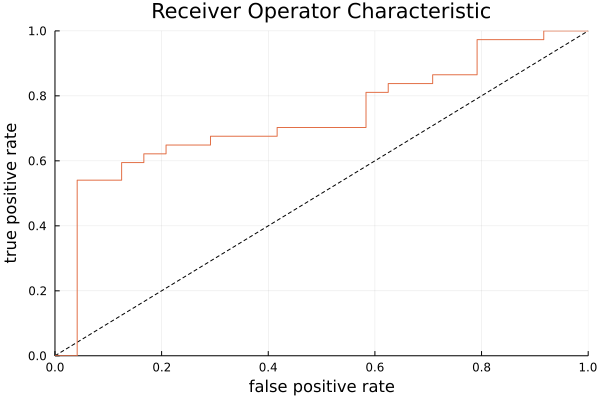

In [46]:
plot(roc1,label="")

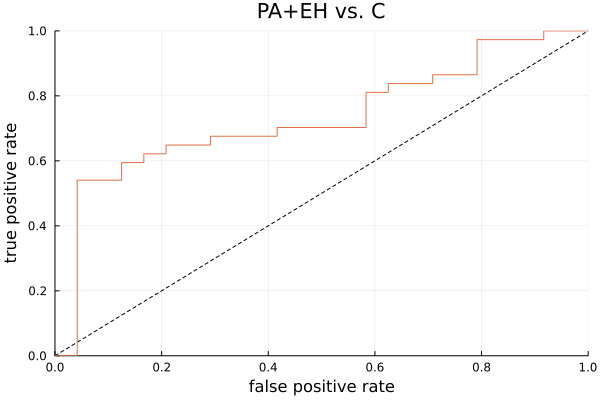

In [47]:
title!(task0[1])

In [50]:
savefig("roc_paehvsc.pdf")

In [660]:
clres2=copy(clres)

14×4 DataFrame
 Row │ featureset   task                  acc_mean  acc_std  
     │ String       String                Float64   Float64  
─────┼───────────────────────────────────────────────────────
   1 │ PA vs. EH    clinical              0.514286  0.507093
   2 │ PA vs. EH    clinical+IMT          0.657143  0.481594
   3 │ PA vs. EH    clinical+IMT+texture  0.542857  0.505433
   4 │ PA vs. EH    clinical+texture      0.657143  0.481594
   5 │ PA vs. EH    texture only          0.702703  0.463373
   6 │ PA vs. EH    sex+age               0.486486  0.506712
   7 │ PA vs. EH    aldo                  0.945946  0.229243
   8 │ PA+EH vs. C  clinical              0.890909  0.314627
   9 │ PA+EH vs. C  clinical+IMT          0.94      0.239898
  10 │ PA+EH vs. C  clinical+IMT+texture  0.92      0.274048
  11 │ PA+EH vs. C  clinical+texture      0.890909  0.314627
  12 │ PA+EH vs. C  texture only          0.622951  0.488669
  13 │ PA+EH vs. C  sex+age               0.540984  0.502453
  14 │ PA+EH vs. C  aldo                  1.0       0.0

In [486]:
import BSON

In [688]:
BSON.@save "classification_results.bson" clres 

In [113]:
clres

14×4 DataFrame
 Row │ task         featureset            acc_mean  acc_std  
     │ String       String                Float64   Float64  
─────┼───────────────────────────────────────────────────────
   1 │ PA vs. EH    clinical              0.571429  0.502096
   2 │ PA vs. EH    clinical+IMT          0.628571  0.490241
   3 │ PA vs. EH    clinical+IMT+texture  0.628571  0.490241
   4 │ PA vs. EH    clinical+texture      0.571429  0.502096
   5 │ PA vs. EH    texture only          0.72973   0.450225
   6 │ PA vs. EH    sex+age               0.540541  0.505228
   7 │ PA vs. EH    aldo                  0.918919  0.276725
   8 │ PA+EH vs. C  clinical              0.890909  0.314627
   9 │ PA+EH vs. C  clinical+IMT          0.92      0.274048
  10 │ PA+EH vs. C  clinical+IMT+texture  0.94      0.239898
  11 │ PA+EH vs. C  clinical+texture      0.890909  0.314627
  12 │ PA+EH vs. C  texture only          0.655738  0.47907
  13 │ PA+EH vs. C  sex+age               0.540984  0.502453
  14 │ PA+EH vs. C  aldo                  1.0       0.0

Output LaTeX text for the table 7 (tab:classification_accuracy) of classification results

In [114]:
classification_table(clres,tasks,featuresets)

clinical & 0.57 & 0.89 \\
clinical+IMT & 0.63 & 0.92 \\
clinical+IMT+texture & 0.63 & 0.94 \\
clinical+texture & 0.57 & 0.89 \\
texture only & 0.73 & 0.66 \\
sex+age & 0.54 & 0.54 \\
aldo & 0.92 & 1.00 \\


In [52]:
scores2,labels2=calculate_scores(dfa,featuresets[2],task1,allattrs,classifier_factory)

evaluate_classification: task=PA vs. EH featureset=texture only attrs=153 group1=41 group2=118


(Any[Float32[0.9151077], Float32[0.61380434], Float32[0.8102858], Float32[0.75329113], Float32[0.94457674], Float32[0.7193286], Float32[0.91388035], Float32[0.7239896], Float32[0.9617337], Float32[0.7737249]  …  Float32[0.91008234], Float32[0.84113985], Float32[0.6514327], Float32[0.8834736], Float32[0.6249953], Float32[0.8148922], Float32[0.84762245], Float32[0.9395866], Float32[0.92254174], Float32[0.49880156]], Any[CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"], CategoricalArrays.CategoricalValue{String, UInt32}["0"]  …  Categ

In [53]:
labelsi2=map(t->int.(t[1]),labels2)

37-element Vector{UInt32}:
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000001
 0x00000002
 0x00000002
 0x00000002
          ⋮
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002
 0x00000002

In [54]:
scoresf2=map(t->t[1],scores2)

37-element Vector{Float32}:
 0.9151077
 0.61380434
 0.8102858
 0.75329113
 0.94457674
 0.7193286
 0.91388035
 0.7239896
 0.9617337
 0.7737249
 0.8631381
 0.815738
 0.88495237
 ⋮
 0.5603232
 0.5791445
 0.91008234
 0.84113985
 0.6514327
 0.8834736
 0.6249953
 0.8148922
 0.84762245
 0.9395866
 0.92254174
 0.49880156

In [56]:
roc2=ROC.roc(scoresf2,labels2)

ROC.ROCData{Infinity.InfExtendedReal{Float32}}(Infinity.InfExtendedReal{Float32}[Infinity.InfExtendedReal{Float32}(∞), Infinity.InfExtendedReal{Float32}(0.9617337f0), Infinity.InfExtendedReal{Float32}(0.94457674f0), Infinity.InfExtendedReal{Float32}(0.9395866f0), Infinity.InfExtendedReal{Float32}(0.92254174f0), Infinity.InfExtendedReal{Float32}(0.9151077f0), Infinity.InfExtendedReal{Float32}(0.91388035f0), Infinity.InfExtendedReal{Float32}(0.91008234f0), Infinity.InfExtendedReal{Float32}(0.8931995f0), Infinity.InfExtendedReal{Float32}(0.8859494f0)  …  Infinity.InfExtendedReal{Float32}(0.7239896f0), Infinity.InfExtendedReal{Float32}(0.7223449f0), Infinity.InfExtendedReal{Float32}(0.7193286f0), Infinity.InfExtendedReal{Float32}(0.69661313f0), Infinity.InfExtendedReal{Float32}(0.6514327f0), Infinity.InfExtendedReal{Float32}(0.6249953f0), Infinity.InfExtendedReal{Float32}(0.61380434f0), Infinity.InfExtendedReal{Float32}(0.5791445f0), Infinity.InfExtendedReal{Float32}(0.5603232f0), Infinity

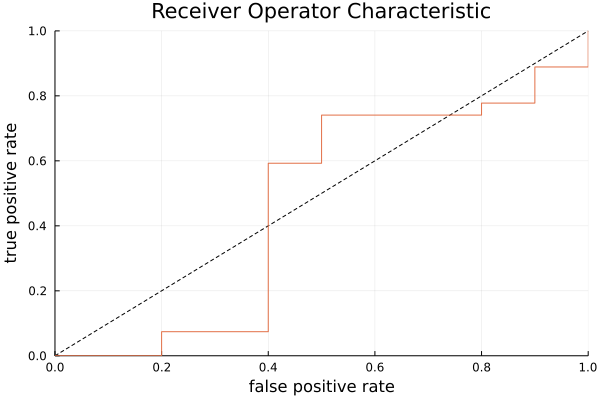

In [57]:
plot(roc2,label="")

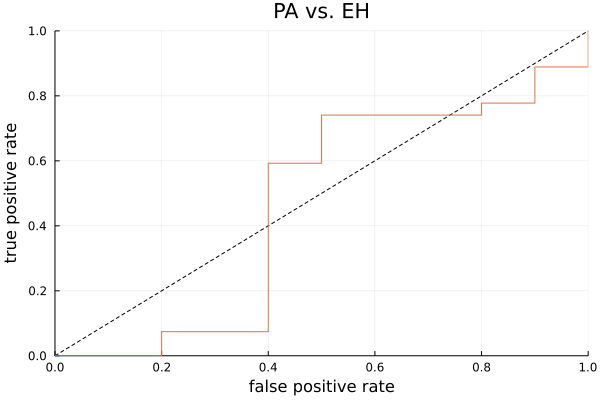

In [58]:
title!(task1[1])

In [59]:
savefig("roc_pavseh.pdf")